In [ ]:
#!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 kB 6.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2
import shutil
import tqdm
import glob


In [ ]:
# Check GPU is working or not
import torch
print(f"Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


Using torch 2.3.0+cu121 (Tesla T4)


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
#날씨
import requests
import json

city = "Seoul" #도시
apiKey = "25ae92023210f98156f2d65b5cdb15b6"
lang = 'kr' #언어
units = 'metric' #화씨 온도를 섭씨 온도로 변경
api = f"https://api.openweathermap.org/data/2.5/weather?q={city}&APPID={apiKey}&lang={lang}&units={units}"

result = requests.get(api)
result = json.loads(result.text)

print(result['main']['temp'])
current_weather = int(result['main']['temp'])
print(current_weather)

32.66
32


In [ ]:
#1 날씨가 15도 이하 : 긴팔
#2 날씨가 15도 초과 : 반팔


In [ ]:
images_path = '/content/drive/MyDrive/colorful_fashion_dataset_for_object_detection/JPEGImages'
annotations_path  = '/content/drive/MyDrive/colorful_fashion_dataset_for_object_detection/Annotations_txt'
path = '/content/drive/MyDrive/colorful_fashion_dataset_for_object_detection'

In [ ]:
train = []
with open('/content/drive/MyDrive/colorful_fashion_dataset_for_object_detection/ImageSets/Main/trainval.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        train.append(line)

test = []
with open('/content/drive/MyDrive/colorful_fashion_dataset_for_object_detection/ImageSets/Main/test.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        test.append(line)


In [ ]:
len(train), len(test)


(2145, 537)

In [ ]:
os.mkdir('train')
os.mkdir('train/images')
os.mkdir('train/labels')

os.mkdir('test')
os.mkdir('test/images')
os.mkdir('test/labels')


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")


100%|██████████| 49.7M/49.7M [00:00<00:00, 317MB/s]


In [ ]:
train_path = '/content/train'
test_path = '/content/test'

print('Copying Train Data..!!')
for i in tqdm.tqdm(train):
    a = shutil.copyfile(images_path+'/'+i+'.jpg', train_path+'/images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+'/'+i+'.txt', train_path+'/labels/'+i+'.txt')

print('Copying Test Data..!!')
for i in tqdm.tqdm(test):
    a = shutil.copyfile(images_path+'/'+i+'.jpg', test_path+'/images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+'/'+i+'.txt', test_path+'/labels/'+i+'.txt')


Copying Train Data..!!


100%|██████████| 2145/2145 [16:26<00:00,  2.17it/s]


Copying Test Data..!!


100%|██████████| 537/537 [03:40<00:00,  2.44it/s]


In [ ]:
text = """
train: /content/train
val: /content/test

# number of classes
nc: 10

# class names|
names: ['sunglass','hat','jacket','shirt','pants','shorts','skirt','dress','bag','shoe']
"""
with open("data.yaml", 'w') as file:
    file.write(text)


In [ ]:
#!pip install pydantic[dotenv]
#!pip install pydantic[dotenv] --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.9/423.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: annotated-types
    Found existing installation: annotated-types 0.7.0
    Uninstalling annotated-types-0.7.0:
      Successfully uninstalled annotated-types-0.7.0
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.20.1
    Uninstalling pydantic_core-2.20.1:
      Successfully uninstalled pydantic_core-2.20.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.8.2
    Uninstalling pydantic-2.8.2:
      Successfully uninstalled pydantic-2.8.2


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")

model.train(data='data.yaml', epochs=5)


Ultralytics YOLOv8.2.56 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

100%|██████████| 755k/755k [00:00<00:00, 25.9MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 120MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/train/labels... 2145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2145/2145 [00:01<00:00, 1939.64it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/test/labels... 537 images, 0 backgrounds, 0 corrupt: 100%|██████████| 537/537 [00:00<00:00, 659.03it/s]


val: New cache created: /content/test/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      7.23G      1.314      1.835      1.418         10        640: 100%|██████████| 135/135 [01:18<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.09it/s]

                   all        537       2035      0.562      0.654       0.63      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      7.21G      1.254      1.227      1.372          4        640: 100%|██████████| 135/135 [01:13<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.31it/s]


                   all        537       2035      0.585      0.648      0.635      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5       7.2G      1.213      1.126      1.344          9        640: 100%|██████████| 135/135 [01:12<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.49it/s]

                   all        537       2035      0.659      0.719      0.725      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      7.08G      1.181       1.03      1.325          9        640: 100%|██████████| 135/135 [01:12<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.54it/s]

                   all        537       2035      0.724      0.761      0.771      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      7.17G      1.114     0.9133      1.282          7        640: 100%|██████████| 135/135 [01:13<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.61it/s]

                   all        537       2035       0.76      0.763       0.78      0.529



5 epochs completed in 0.118 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.56 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.30it/s]


                   all        537       2035      0.761      0.763       0.78       0.53
              sunglass         82         82      0.753      0.134      0.317      0.112
                   hat         77         77      0.787      0.817      0.835      0.486
                jacket        179        181      0.845      0.757      0.864      0.656
                 shirt        361        366      0.743      0.863      0.822      0.594
                 pants        114        114      0.823       0.93      0.957       0.76
                shorts        107        107      0.756      0.916      0.781      0.524
                 skirt        186        186      0.751      0.828      0.824      0.654
                 dress        128        128      0.692      0.828      0.803      0.605
                   bag        274        274      0.731      0.737      0.789      0.444
                  shoe        520        520      0.734      0.822      0.808      0.462
Speed: 0.4ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f4f95623fa0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

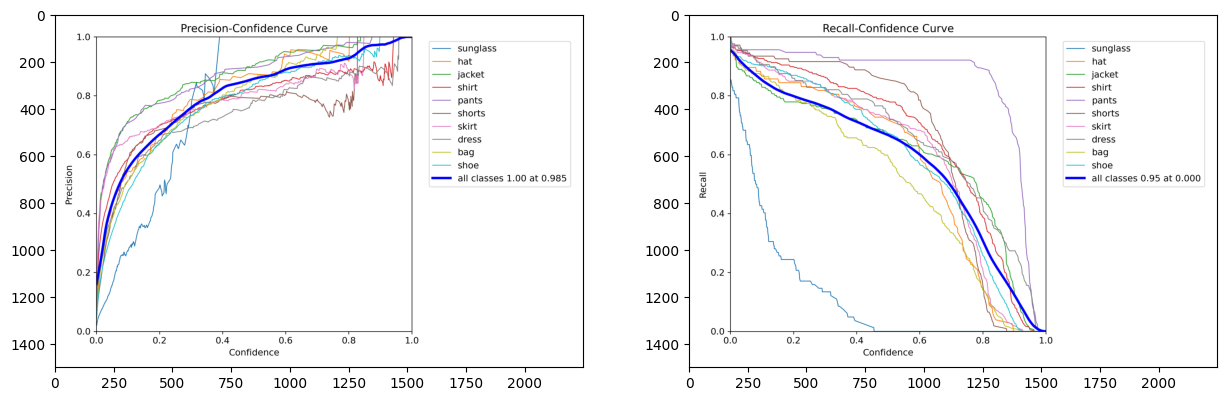

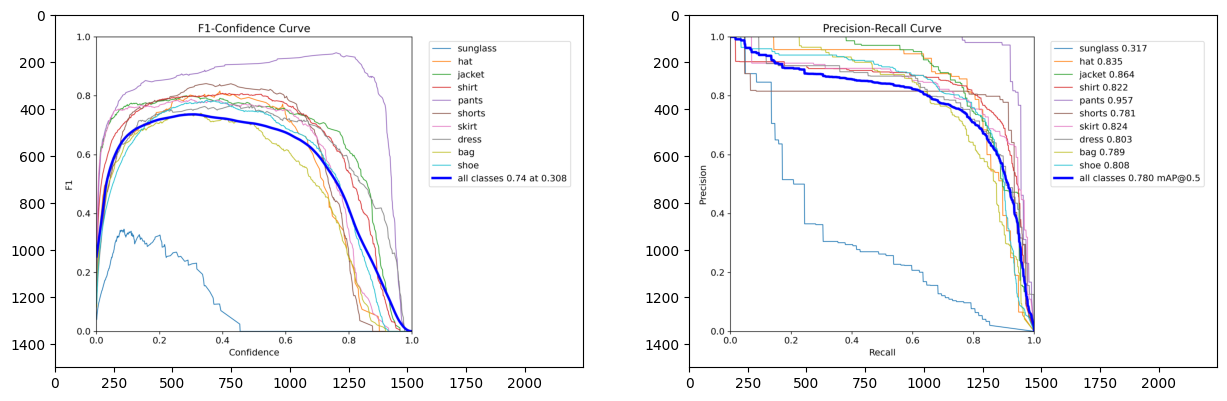

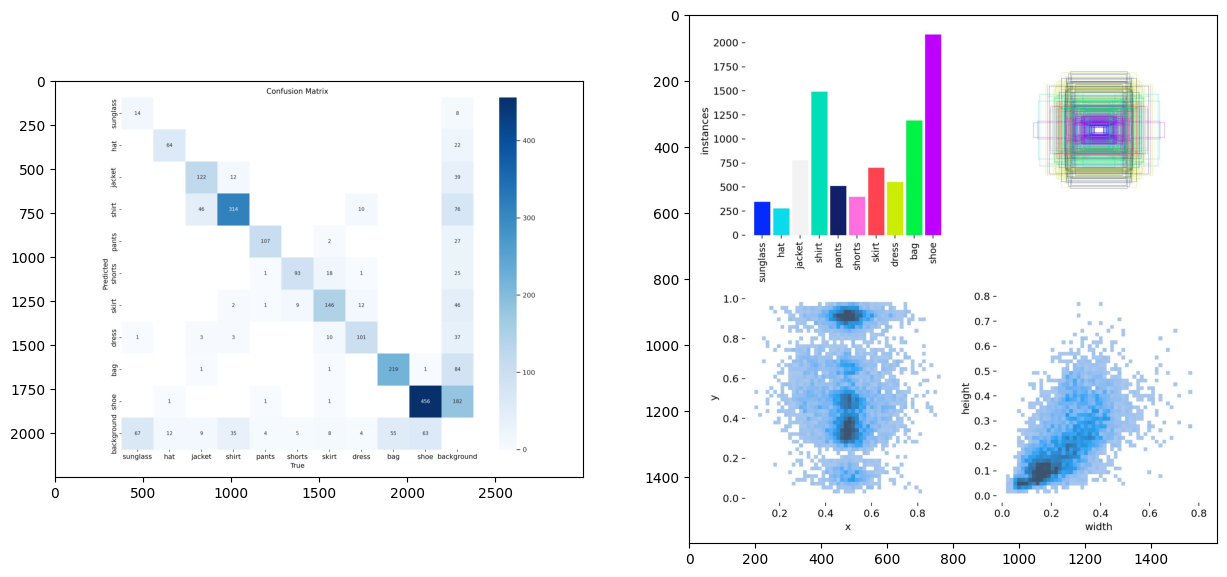

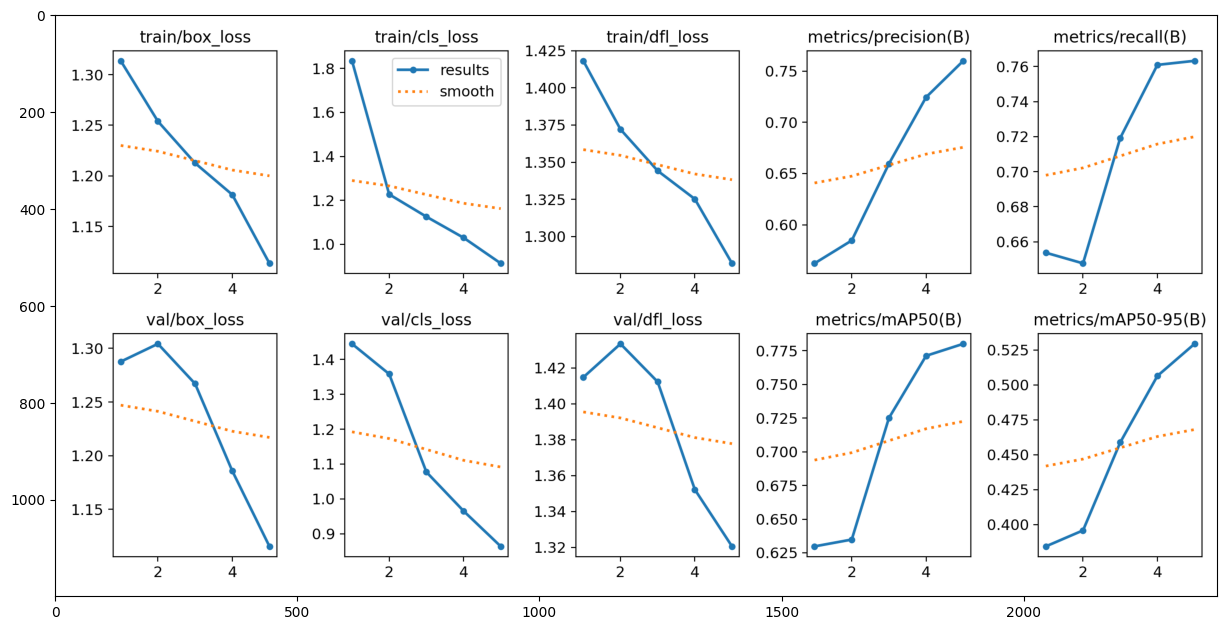

In [ ]:
%matplotlib inline
model_path = 'runs/detect/train/'

def plot(ls, size):
    c=1
    plt.figure(figsize=(15,10))
    for im in ls:
        plt.subplot(size[0],size[1],c)
        im = plt.imread(model_path+im)
        plt.imshow(im)
        c+=1
    plt.show()

plot(['P_curve.png','R_curve.png'], (1,2))
plot(['F1_curve.png','PR_curve.png'], (1,2))
plot(['confusion_matrix.png','labels.jpg'], (1,2))
plot(['results.png'],(1,1))


WARNING ⚠️ 'line_thickness' is deprecated and will be removed in in the future. Please use 'line_width' instead.

image 1/1 /content/다운로드.jpeg: 640x640 1 jacket, 1 shirt, 1 pants, 67.4ms
Speed: 4.4ms preprocess, 67.4ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train8
pants
shirt
jacket


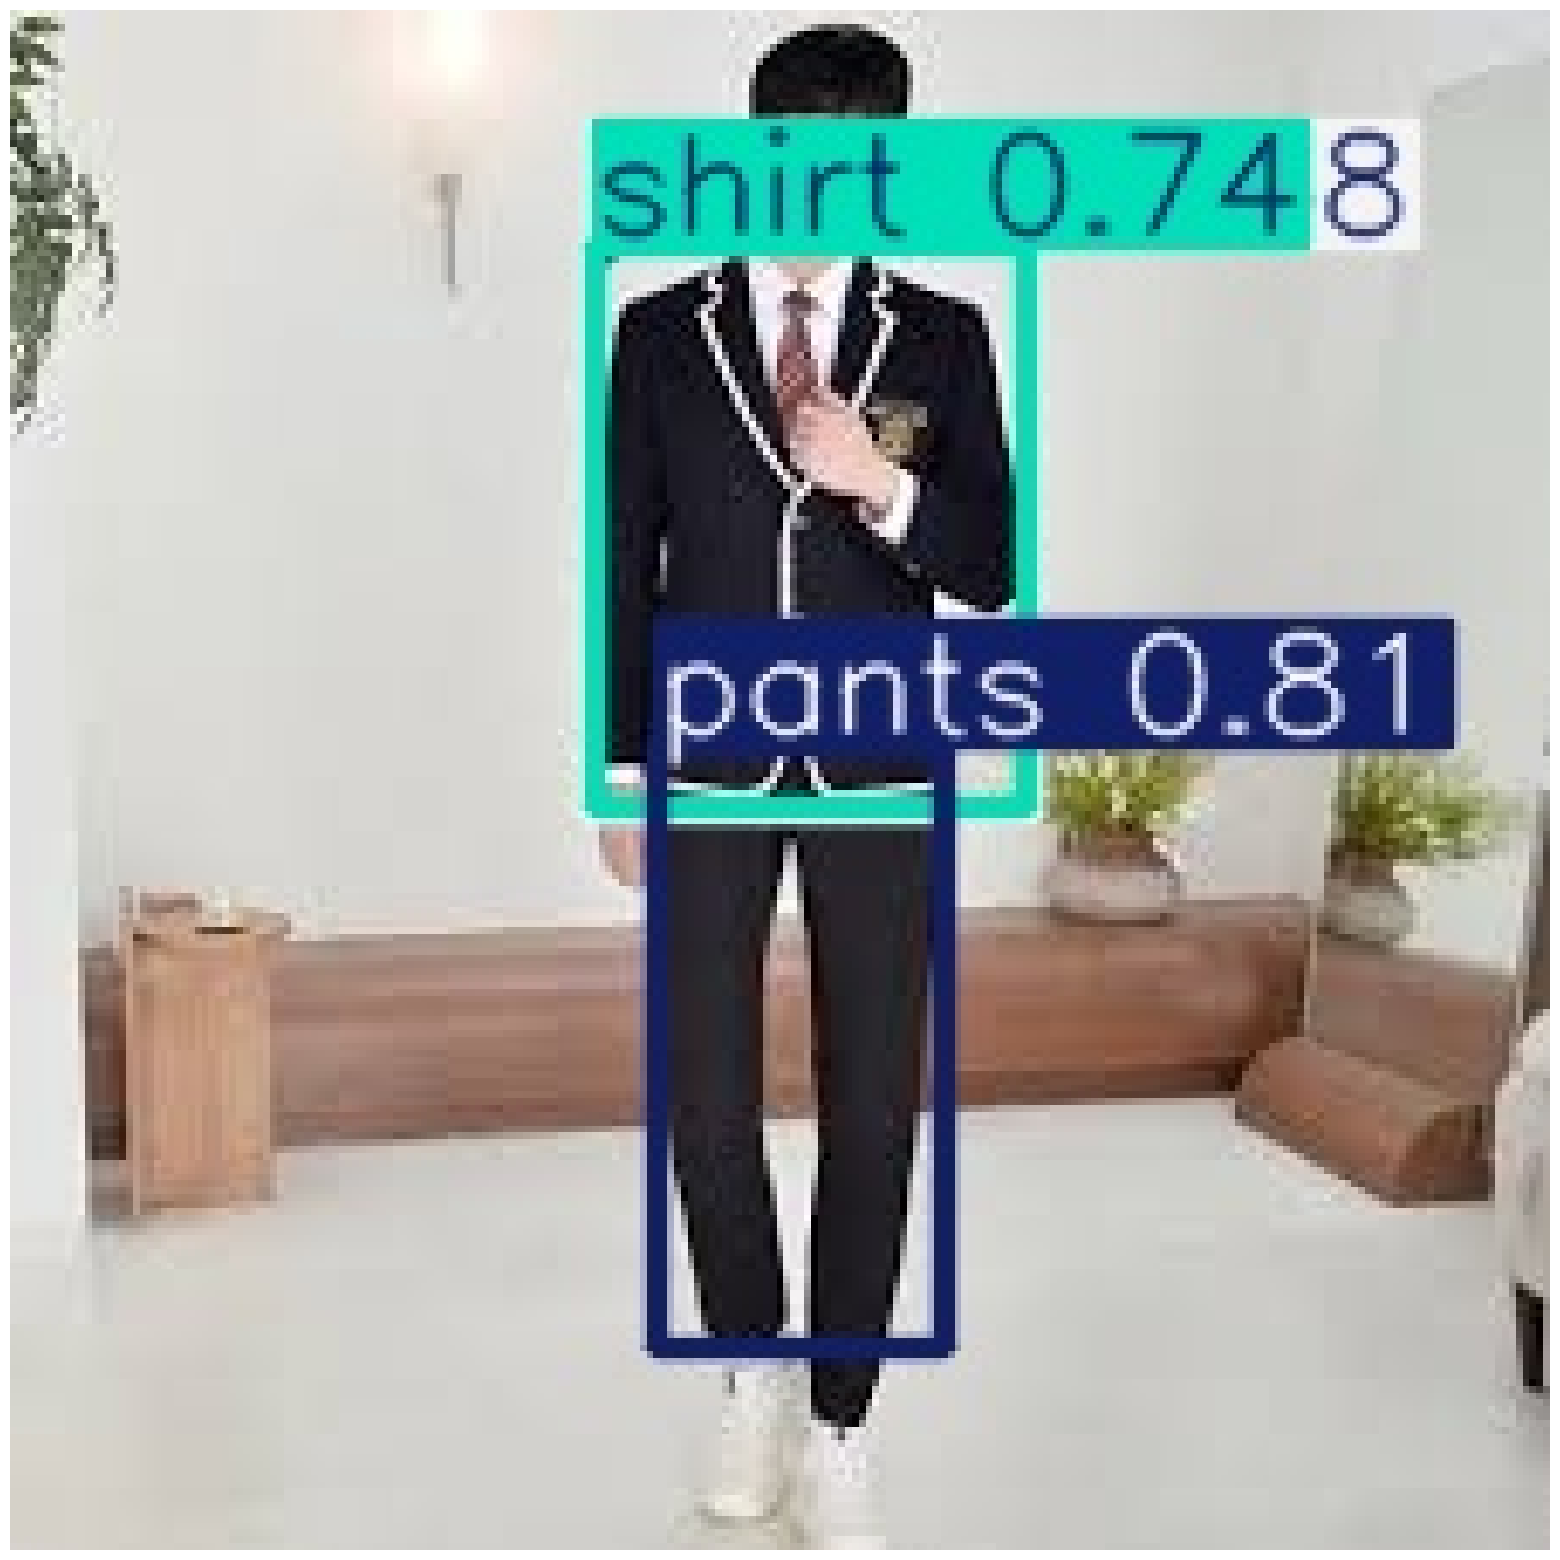

In [ ]:
# choose random image from dataset
plt.figure(figsize=(20,20))
imgs = random.sample(os.listdir(images_path), 6)
i=model.predict(source='/content/다운로드.jpeg', conf=0.4, save=True, line_thickness=2)

im = plt.imread('/content/runs/detect/train6/다운로드.jpeg')
plt.axis('off')
plt.imshow(im)

for i in i:
    for box in i.boxes:
        class_id = int(box.data[0][-1])
        print(model.names[class_id])


In [ ]:
#class 구하기
#results = model.predict(source="0")

for i in i:
    for box in i.boxes:
        class_id = int(box.data[0][-1])
        print(model.names[class_id])


pants
shirt
jacket


In [ ]:
#15도 이하에서 입어도 되는 옷 : jacket, pants
#15도 초과에서 입어야하는 옷 :  skirt, shorts, hat, sunglass
